In [274]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [275]:
df =pd.read_csv('income_evaluation.csv')

In [276]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [277]:
d = [c.strip().replace('-','_') for c in df.columns]

df.columns = d

In [278]:
df.shape

(32561, 15)

In [279]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [280]:
df['workclass'].dtype == 'O'

True

In [281]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital_status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [283]:
def initial_eda(df):
    total_na = df.isna().sum().sum()
    print(f"Dimensions: {df.shape[0]} rows, {df.shape[1]} coliumns ")
    print(f"Total NA values : {total_na}")
    col_name = df.columns
    dtyp = df.dtypes
    uniq = df.nunique()
   
    na_val = df.isna().sum()
    print("%40s %10s %10s %10s" %("Column Name", "Data Type", "#Distinct", "NA Values"))
    for i in range(len(df.columns)):
        print(f"%40s %10s %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))

    for i in df.columns:        
        if df[i].nunique() <= 15:
            print(f"\n\n{i} ===>")
            l = df[i].unique().tolist()
            print(l)

    

In [284]:
initial_eda(df)

Dimensions: 32561 rows, 15 coliumns 
Total NA values : 0
                             Column Name  Data Type  #Distinct  NA Values
                                     age      int64         73          0
                               workclass     object          9          0
                                  fnlwgt      int64      21648          0
                               education     object         16          0
                           education_num      int64         16          0
                          marital_status     object          7          0
                              occupation     object         15          0
                            relationship     object          6          0
                                    race     object          5          0
                                     sex     object          2          0
                            capital_gain      int64        119          0
                            capital_loss      int64    

In [285]:
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].head()

for var in categorical:
    print(f" ({df[var].value_counts()/np.float(len(df))})")


 ( Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64)
 ( HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64)
 ( Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.0007

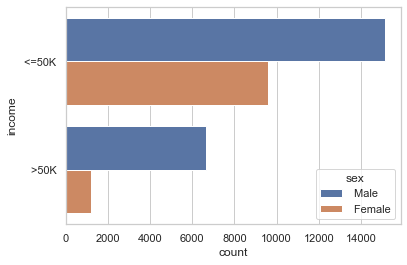

In [286]:
sns.set(style="whitegrid")
sns.countplot(y="income", hue="sex", data=df)
plt.show()

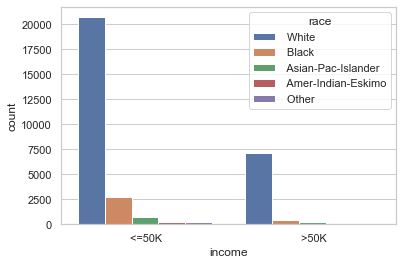

In [287]:
sns.set(style="whitegrid")
sns.countplot(x="income", hue="race", data=df)
plt.show()

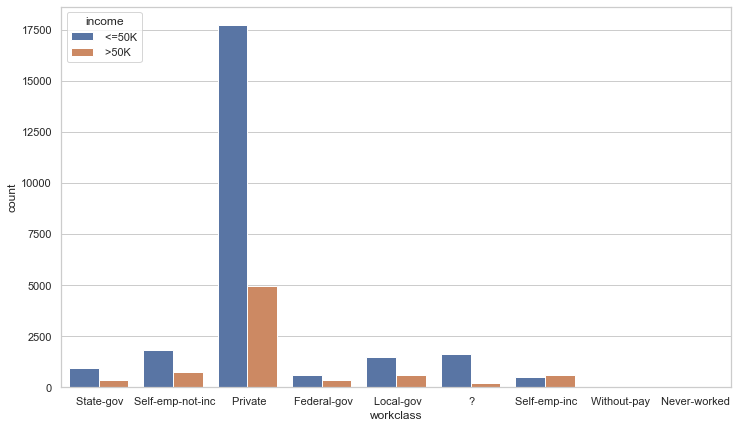

In [288]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
sns.countplot(x="workclass", hue="income", data=df)
plt.show()

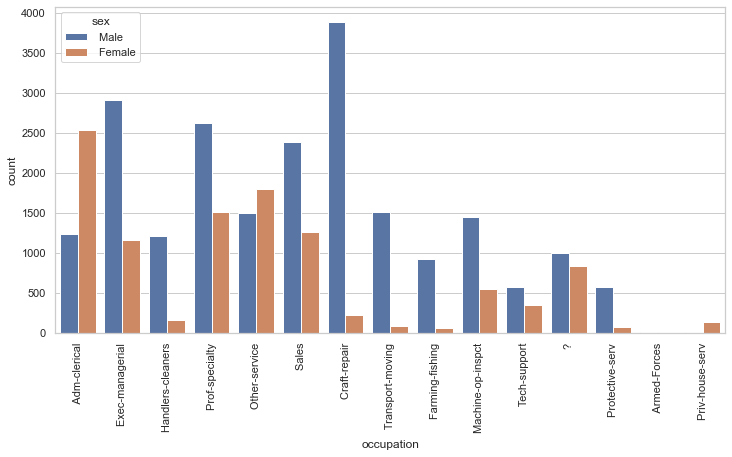

In [289]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(x="occupation", hue="sex", data=df)
plt.xticks(rotation=90)
plt.show()

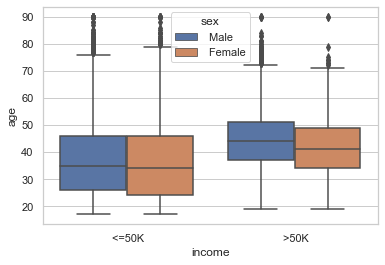

In [290]:
sns.boxplot(x="income", y="age", hue="sex", data=df)
plt.show()

In [291]:
X = df.drop(['income'], axis=1)
y = df['income']

In [292]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [293]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [294]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany


In [295]:
numerical = [var for var in X_train.columns if df[var].dtype !='O']
categorical = [var for var in X_train.columns if df[var].dtype =='O']

In [296]:
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [297]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [298]:
X_train[categorical].isnull().mean()

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64

In [299]:
import category_encoders as ce 
encoder = ce.OneHotEncoder(cols = ['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [300]:
cols = X_train.columns

In [301]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [302]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [303]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [304]:
y_pred = rfc.predict(X_test)

In [305]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8554611526256526

In [307]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [308]:
pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

fnlwgt               0.156648
age                  0.154340
capital_gain         0.093419
hours_per_week       0.082624
education_num        0.062174
                       ...   
native_country_17    0.000028
native_country_36    0.000015
occupation_15        0.000011
workclass_9          0.000006
native_country_42    0.000000
Length: 108, dtype: float64